<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/Ayantika_Sur_2211591_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Basics: Training Your First Neural Network**
* we will use Tenserflow
* Keras Is integrated
* Goal - Train with given data
* Improve the model with added data 

The problem that we want to solve is to convert from celsius to Farhenheit, whre the aprrox formula is :

           f=c*1.8+32 ---> Rule


# **Importing important Libraries**

In [1]:
!pip install tensorflow #installing tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf#importing tensorflow

In [3]:
tf.__version__ #to see the tensorflow version

'2.9.2'

In [4]:
import numpy as np
import logging
logger = tf.get_logger() #This is the class whose objects will be used in the application code directly to call the functions
logger.setLevel(logging.ERROR)

### My task here is to create a model that can take new values in celsius and can give the temperature in Fahranheit.


## **Setting Up and Training the data**

We are creating 2 lists -

* celsius_q
* fahrenheit_a

to train the model

In [5]:
celsius_q =np.array([-40,-10,0,8,15,22,38], dtype=float)#these 7 datapoints are our training data now
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)#these 7 datapoints are our training data now
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i])) #priniting the traing data

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


#**Machine Learning Terminology**

* Feature - The input variable - The degree in Celsius.
* Labels - The output our model predicts - The dregrees in Fahrenheit.



#**Creating The Neural Model**

# **Building a Layer**

We will create a simple network with only a single layer and with single neuron.

Creating a layer L0 by instantiating it.

Definining the following:



*   units=x - it specifies the number of layers in the neurons. 


*   input_shape=[y] - it specifies the input to the layer.

Here we build a model which is of single layer unit=1 and since it is the final layer it is also the output size of the model. Also input size is the input shape of the model.





In [6]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

#**Assembling Layers**

After the layers is defined we need to assemble them into a model.

The sequential model takes a lists of layers as an arguments specifying the calculation order from input to output.

This model has single layer L0




In [7]:
model = tf.keras.Sequential([L0])

#**Compiling the Model**

Before training the model we have to compile it. Model is compiled on the basis of -

* **Loss Function** - it measures the distance between prediction and the desired outcome. The distance is called 'loss'.

* **Optimizer function** - a way of adjusting internal values in order to reduce the loss.



In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1)) #0.1 is the learning rate
#Here loss function is 'mean_squared_error' and optimizer is Adam

#**Training the Model**

We train the model by calling fit method.


During training machine takes in input and weights are decided by computer randomly. 

Then it calculates the difference between the actual output and desired output, that we called the loss function. The optimizer function directs the machine how the weights should be adjusted.

The fit method refers this cycle of calcualte --> compare --> adjust

* Input ---> celsius_q
* Output ---> fahrenheit_a
* Number of times cycle should run ---> epochs, 
* Controlling the amount of o/p to be produced ---> verbose

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


#**Loss Magnitude VS Epoch Number**

From fit method we get a history object. By this object we can plot how much the loss of our model goes down after each training epoch.

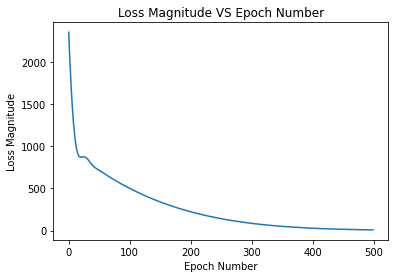

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Loss Magnitude VS Epoch Number')
plt.plot(history.history['loss'])

From the above figure we can see Loss Magnitude is decreasing at at larger rate with increase in Epoch Number,i.e., improving at a higher rate and then the improvement slowed down utill its very near 'perfect' towards the end.

#**Predicting New Values**

In [11]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 82ms/step
[[211.32898]]


The correct answer should be 

```
 100*1.8+32=212
```



#**Weights and Bias**
* **Weights**: weights are the real values that are attached with each input/feature and they convey the importance of that corresponding feature in predicting the final output. 
* **Bias**: Bias is used for shifting the activation function towards left or right, we can compare this to intercept in the line equation.

In [12]:
print("Thses are the layer variables:{}".format(L0.get_weights()))

Thses are the layer variables:[array([[1.8218573]], dtype=float32), array([29.143244], dtype=float32)]


* formulae ---> fahrenheit = 1.8*celsius+32

We want to get the bias close to 1.8 and weights close to 32




Changing the learning rate didnt help 
we can change epoch to 1000
We have to add more data points.

In [13]:
#L0 = tf.keras.layers.Dense(units=4, input_shape=[1])
#L1 = tf.keras.layers.Dense(units=4)
#L2 = tf.keras.layers.Dense(units=1)
#model = tf.keras.Sequential([L0, L1, L2])
#model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
#model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
#print("Finished training the model")
#print(model.predict([100.0]))
#print("These are the l0 variables: {}".format(L0.get_weights()))
#print("These are the l1 variables: {}".format(L1.get_weights()))
#print("These are the l2 variables: {}".format(L2.get_weights()))
#print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))

#it increases the model complexity

# **Improving The Model**

We can improve the model by -
* Adding more data points
* Increasing epoch number(may be)

## **Adding more data points**

In [14]:
def cel_to_far(cel):
  return (1.8*cel+32)
celsius=[]
fahrenheit=[]
for i in range(-50,80):
  celsius.append(i)
  fahrenheit.append(cel_to_far(i))
print(celsius)
print(fahrenheit)




[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[-58.0, -56.2, -54.400000000000006, -52.60000000000001, -50.8, -49.0, -47.2, -45.400000000000006, -43.60000000000001, -41.8, -40.0, -38.2, -36.400000000000006, -34.60000000000001, -32.8, -31.0, -29.200000000000003, -27.4, -25.6, -23.800000000000004, -22.0, -20.200000000000003, -18.4, -16.6, -14.800000000000004, -13.0, -11.200000000000003, -9.399999999999999, -7.600000000000001, -5.800000000000004, -4.0, -2.200000000000003, -0.3999999999999986, 

In [15]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [16]:
model = tf.keras.Sequential([L0])

In [17]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [18]:
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


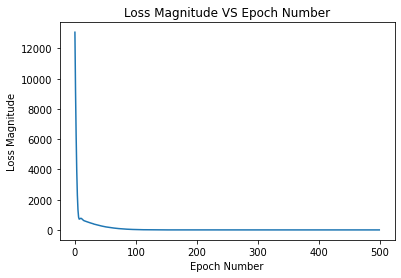

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Loss Magnitude VS Epoch Number')
plt.plot(history.history['loss'])

In [20]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 60ms/step
[[212.00002]]


In [21]:
print("Thses are the layer variables:{}".format(L0.get_weights()))

Thses are the layer variables:[array([[1.8000005]], dtype=float32), array([31.999958], dtype=float32)]


**So we can see that model have improved very well by increasing the data points.**

## **Increasing epoch number**

In [22]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [23]:
model = tf.keras.Sequential([L0])

In [24]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [25]:
history = model.fit(celsius, fahrenheit, epochs=800, verbose=False)
print("Finished training the model")

Finished training the model


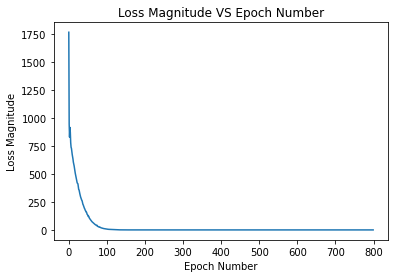

In [26]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Loss Magnitude VS Epoch Number')
plt.plot(history.history['loss'])

In [27]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 53ms/step
[[212.00003]]


In [28]:
print("Thses are the layer variables:{}".format(L0.get_weights()))

Thses are the layer variables:[array([[1.8000004]], dtype=float32), array([31.999989], dtype=float32)]


The model accuracy didnot improve much by increasing the epoch number and it is also shown in the plot that with increasing the epoch number loss is not decresing as much. 

## **The best method to improve the model is to increase the number of datapoints**